# Trabalho No. 2

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

In [1147]:
import warnings
warnings.filterwarnings('ignore')

```{admonition} Questão 1

Considere as regressções de $Y$ sobre $x$ para os dados abaixo, especificadas por $E(Y) = \beta_0x$ e $E(Y) = \beta_1x + \beta_2x^2$.
Demonstre que $\beta_0 = 3.077$, $\beta_1 = 2.406$ e $\beta_2 = 0.138$. Qual desses modelos seria o preferido?


| y   |  5  |  7  |  7  |  10 |  16 |  20 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  x  |  1  |  2  |  3  |  4  |  5  |  6  |

```

Aplicando os dados a um dataframe, temos:

In [1148]:
import numpy as np
import pandas as pd

q1_dados = pd.DataFrame({"x": np.arange(1, 7), "y": [5, 7, 7, 10, 16, 20]})

Estimando $\hat{\beta} = (X^{T} X)^{-1} X^{T} Y$, temos:

Modelo $E(Y) = \beta_0x$:

In [1149]:
from IPython.display import Latex

Y = q1_dados.y
X = np.vstack(q1_dados.x)

beta0_estimado = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

Latex(f'\\beta_0 = {beta0_estimado[0]:.3f}')

<IPython.core.display.Latex object>

Modelo $E(Y) = \beta_1x + \beta_2x^2$:

In [1150]:
X = np.column_stack([q1_dados.x, np.square(q1_dados.x)])

beta1_beta2_estimados = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

Latex(
    f"\\beta_1 = {beta1_beta2_estimados[0]:.3f} \\\\ "
    + f"\\beta_2 = {beta1_beta2_estimados[1]:.3f}"
)


<IPython.core.display.Latex object>

Para seleção de qual modelo é melhor, utilizamos o Critério de Informação Akaike (AIC).

In [1151]:
import statsmodels.formula.api as smf

modelo_b0 = smf.ols('y ~ 0 + x', q1_dados)
fit_modelo_b0 = modelo_b0.fit()

aic_modelo_b0 = fit_modelo_b0.info_criteria(crit="aic", dk_params=1)

Latex(f"AIC = {aic_modelo_b0}")

<IPython.core.display.Latex object>

In [1152]:
modelo_b1_b2 = smf.ols('y ~ 0 + x + np.square(x)', q1_dados)
fit_modelo_b1_b2 = modelo_b1_b2.fit()

aic_modelo_b1_b2 = fit_modelo_b1_b2.info_criteria(crit="aic", dk_params=1)

Latex(f"AIC = {aic_modelo_b1_b2}")

<IPython.core.display.Latex object>

Como o AIC do modelo apenas com $\beta_0$ é menor, este modelo deve ser o preferido.

```{admonition} Questão 2

O conjunto de dados abaixo corresponde à produção anual de milho $Y$ em Kg/ha e a quantidade de chuva $x$ em mm, durante 7 anos em um determinado município.


|  y  |   1295  |   1304  |   1300  |   1428  |  1456   |  1603   |  1535   |
|:---:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|  x  | 1094.10 | 1180.15 | 1137.30 | 1714.80 | 1289.50 | 1401.50 | 1640.40 |

**a)** Ajustar um modelo de regressão linear $Y = \beta_0 + \beta_1x + \epsilon$ aos dados encontrar as estimativas de $\beta_0$, $\beta_1$, encontrar os correspondentes desvios padrões dos coeficientes estimados assim como $s^2$ e $R^2$.

**b)** Calcular os resíduos ($r_i$) para cada observação. Verificar se há pontos aberrantes. Fazer os gráficos de $r_i$ contra $\hat{\mu_i}$ e $r_i$ contra $i$. Nota-se alguma tendência sistemática nesse gráficos?

**c)** Sugerir um novo modelo com base nos gráficos. Obter as estimativas correspondentes. Compare o $s^2$ e $R^2$, se procedente, desse novo modelo com aqueles do modelo adequado em (a).

**d)** Suponha que num determinado ano choveu 1250mm. Calcular um intervalo de 95% para a produção de milho nesse ano utilizando, respectivamente, os modelos ajustados em (a) e (b). Comparar os intervalos obtidos.

```

Aplicando os dados a um dataframe, temos:

In [1153]:
q2_dados = pd.DataFrame(
    {
        "x": [1094.1, 1180.15, 1137.3, 1714.8, 1289.5, 1401.5, 1640.4],
        "y": [1295, 1304, 1300, 1428, 1456, 1603, 1535],
    }
)


**a)** Ajustado a um modelo linear $Y = \beta_0 + \beta_1x + \epsilon$, temos a seguinte tabela com os coeficientes e seus EP, além de $R^2$ do modelo:

In [1154]:
q2_modelo_linear = smf.ols('y ~ x', q2_dados)
q2_fit_modelo_linear = q2_modelo_linear.fit()

q2_fit_modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     3.912
Date:                Mon, 04 Apr 2022   Prob (F-statistic):              0.105
Time:                        22:51:54   Log-Likelihood:                -41.084
No. Observations:                   7   AIC:                             86.17
Df Residuals:                       5   BIC:                             86.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    968.0350    230.348      4.202      0.008     375.906    1560.164
x              0.3325      0.168      1.978      0.105      -0.100       0.765
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.307
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.726
Skew:                           0.767   Prob(JB):                        0.696
Kurtosis:                       2.633   Cond. No.                     8.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**b)** Retirando os valores do modelo ajustado, podemos expandir o dataframe com os valores ajustados e resíduos:

In [1155]:
q2_dados['valores ajustados'] = q2_fit_modelo_linear.fittedvalues
q2_dados['residuos'] = q2_fit_modelo_linear.resid

q2_dados

,x,y,valores ajustados,residuos
0,1094.10,1295,1331.829403,-36.829403
1,1180.15,1304,1360.441509,-56.441509
2,1137.30,1300,1346.193644,-46.193644
3,1714.80,1428,1538.215622,-110.215622
4,1289.50,1456,1396.800995,59.199005
5,1401.50,1603,1434.041621,168.958379
6,1640.40,1535,1513.477206,21.522794


Assim, temos o gráfico $r_i$ contra $\hat{\mu_i}$:

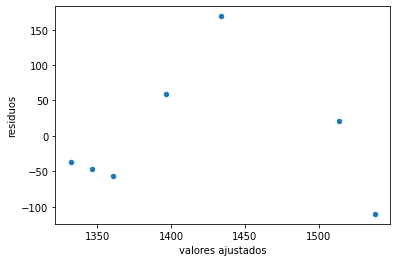

In [1156]:
q2_dados.plot(kind="scatter", x='valores ajustados', y='residuos');

E o gráfico $r_i$ contra $i$:

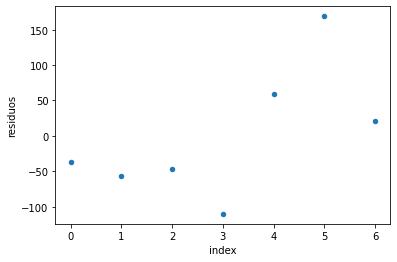

In [1157]:
q2_dados.reset_index().plot(kind="scatter", x='index', y='residuos');

**c)** Analisando o gráfico $r_i$ contra $\hat{\mu_i}$, observamos que os resíduos parecem ter um comportamento quadrático (ligando os pontos forma uma parábola com concavidade para baixo), assim, criando um modelo $E(Y) =\beta_0 + \beta_1x + \beta_2x^2$, temos:

In [1158]:
q2_fit_modelo_quadratico = smf.ols('y ~ x + np.square(x)', q2_dados).fit()
q2_fit_modelo_quadratico.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 04 Apr 2022   Prob (F-statistic):             0.0164
Time:                        22:51:54   Log-Likelihood:                -35.910
No. Observations:                   7   AIC:                             77.82
Df Residuals:                       4   BIC:                             77.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3194.8739   1137.943     -2.808      0.048   -6354.310     -35.438
x                6.4199      1.657      3.875      0.018       1.820      11.020
np.square(x)    -0.0022      0.001     -3.680      0.021      -0.004      -0.001
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.147
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.000   Prob(JB):                        0.797
Kurtosis:                       1.753   Cond. No.                     1.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assim, temos um $R^2$ muito melhor e um AIC menor.

**d)** Seja $x = 1250$, aplicamos este valor nos depois modelos:

In [1159]:
x_proposto = 1250
y_predito_modelo_linear = q2_fit_modelo_linear.get_prediction(exog=dict(x=x_proposto))

y_predito_modelo_linear.summary_frame()


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1383.667024,41.901352,1275.95617,1491.377879,1101.800204,1665.533844


In [1160]:
y_predito_modelo_quadratico = q2_fit_modelo_quadratico.get_prediction(
    exog=dict(x=x_proposto)
)

y_predito_modelo_quadratico.summary_frame()


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1449.470161,28.639638,1369.953778,1528.986544,1279.517415,1619.422907


Comparando os intervalos, vemos que os modelos apresentaram intervalos que se quase se sobrepõem. Nota-se entretanto que o modelo quadrático apresentou um erro padrão menor.

```{admonition} Questão 3

Os dados da Tabela foram obtidos como parte de um experimento para determinar os efeitos da temperatura e do tempo de armazenamento na perda de ácido ascórbico em feijão-vagem. Os grãos foram todos colhidos em condições uniformes numa Estação Agrícola antes das oito horas da manhã. Eles foram preparados e congelados antes do meio-dia do mesmo dia. Três pacotes foram atribuídos aleatoriamente a cada combinação de temperatura em graus Fahrenheit (oF) e tempo de armazenamento, em semanas. A soma das três determinações de ácido ascórbico é mostrada na Tabela.

| Temperatura oF |  2  |  4  |  6  |  8  | Total |
|:--------------:|:---:|:---:|:---:|:---:|:-----:|
| 0              |  45 |  47 |  46 |  46 | 184   |
| 10             |  45 |  43 |  41 |  37 | 166   |
| 20             |  34 |  28 |  21 |  16 |  99   |
| Total          | 124 | 118 | 108 |  99 | 449   |


Suponha, para o propósito de construção do modelo, que a concentração de ácido ascórbico decaia exponencialmente rápido, com uma taxa de decaimento que depende da temperatura. Em outras palavras, para uma dada temperatura de armazenamento T, a concentração esperada após o tempo t (medida em semanas) é $\mu = E(T) = exp(\alpha - \beta_Tt)$ 

A concentração inicial, $exp(\alpha)$, é assumida neste modelo como independente da temperatura de armazenamento. Expresse a teoria acima como um modelo linear generalizado, tratando a temperatura como um fator e o tempo de armazenamento como uma variável.

O modelo acima é incomum porque contém uma interação entre o tempo e a temperatura, mas nenhum efeito principal da temperatura. Por design, as concentrações são iguais no tempo zero.

Estime os tempos necessários em cada uma das três temperaturas para que a concentração
de ácido ascórbico seja reduzida a 50% de seu valor original. Considere cuidadosamente como você pode construir intervalos de confiança para esta meia-vida.

```

In [1161]:
q3_dados = pd.DataFrame(
    {
        "semanas": np.repeat([2, 4, 6, 8], 3),
        "temperatura": np.tile([0, 10, 20], 4),
        "acido": [45, 45, 34, 47, 43, 28, 46, 41, 21, 46, 37, 16],
    }
)

q3_dados['acido']

0     45
1     45
2     34
3     47
4     43
5     28
6     46
7     41
8     21
9     46
10    37
11    16
Name: acido, dtype: int64

In [1162]:
import statsmodels.api as sm

fn_ligacao_log = sm.families.links.log()

q3_modelo_inv_gaussiana = smf.glm(
    "acido ~ semanas:C(temperatura)",
    q3_dados,
    family=sm.families.InverseGaussian(fn_ligacao_log),
)

q3_modelo_binomial = smf.glm(
    "acido ~ 1 + semanas:C(temperatura)",
    q3_dados,
    family=sm.families.Binomial(fn_ligacao_log),
)

q3_ajuste_inv_gaussiana = q3_modelo_inv_gaussiana.fit()

q3_ajuste_inv_gaussiana.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                  GLM                  AIC:                37.1235   
Link Function:          log                  BIC:                -19.8791  
Dependent Variable:     acido                Log-Likelihood:     -14.562   
Date:                   2022-04-04 22:51     LL-Null:            -959.71   
No. Observations:       12                   Deviance:           0.00016432
Df Model:               3                    Pearson chi2:       0.000162  
Df Residuals:           8                    Scale:              2.0230e-05
Method:                 IRLS                                               
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   3.8372   0.0196 195.4629 0.0000  3.7987  3.8757
semanas:C(temperatura)[0]  -0.0011   0.0043  -0.2479 0.8042 -0.0095  0.0074
semanas:C(temperatura)[10] -0.0244   0.0041  -5.9208 0.0000 -0.0325 -0.0163
semanas:C(temperatura)[20] -0.1326   0.0035 -37.7597 0.0000 -0.1395 -0.1257
===========================================================================

"""

In [1163]:
q3_ajuste_binomial = q3_modelo_binomial.fit()
q3_ajuste_binomial.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Generalized linear model
===================================================================================
Model:                      GLM                    AIC:                  nan       
Link Function:              log                    BIC:                  -19.8856  
Dependent Variable:         acido                  Log-Likelihood:       nan       
Date:                       2022-04-04 22:51       LL-Null:              nan       
No. Observations:           12                     Deviance:             -0.0063473
Df Model:                   3                      Pearson chi2:         4.05e+16  
Df Residuals:               8                      Scale:                1.0000    
Method:                     IRLS                                                   
-----------------------------------------------------------------------------------
                            Coef.  Std.Err.        z         P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                   3.8354   0.0000 14639431613.3852 0.0000  3.8354  3.8354
semanas:C(temperatura)[0]  -0.0008   0.0000   -14628269.8340 0.0000 -0.0008 -0.0008
semanas:C(temperatura)[10] -0.0236   0.0000  -416471753.1812 0.0000 -0.0236 -0.0236
semanas:C(temperatura)[20] -0.1330   0.0000 -1536468093.6481 0.0000 -0.1330 -0.1330
===================================================================================

"""

Considerando o bom AIC e menor deviance, o modelo escolhido é o modelo utilizando InverseGaussian

In [1164]:
q3_ajuste = q3_ajuste_inv_gaussiana
q3_dados['valores ajustados'] = q3_ajuste.fittedvalues
q3_dados['residuos'] = q3_ajuste.resid_response

q3_dados

,semanas,temperatura,acido,valores ajustados,residuos
0,2,0,45,46.297081,-1.297081
1,2,10,45,44.184238,0.815762
2,2,20,34,35.590208,-1.590208
3,4,0,47,46.198591,0.801409
4,4,10,43,42.078112,0.921888
5,4,20,28,27.301252,0.698748
6,6,0,46,46.100311,-0.100311
7,6,10,41,40.072379,0.927621
8,6,20,21,20.942793,0.057207
9,8,0,46,46.002239,-0.002239


In [1165]:
ic_50_temp_0 = q3_ajuste.get_prediction(exog=dict(semanas=-70.2611, temperatura=0))
ic_50_temp_0.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,50.0,15.852209,26.859722,93.076169


In [1166]:
ic_50_temp_10 = q3_ajuste.get_prediction(exog=dict(semanas=-3.06363, temperatura=10))
ic_50_temp_10.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,50.0,1.526768,47.095375,53.083769


In [1167]:
ic_50_temp_20 = q3_ajuste.get_prediction(exog=dict(semanas=-0.5643437, temperatura=20))
ic_50_temp_20.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,50.0,1.068176,47.94964,52.138034
